# 26.10 Challenge

Throughout this module, we introduced the amazing and yet challenging domain of unsupervised learning by covering some of the most popular clustering and dimensionality reduction algorithms. Now, it's time for you to apply your unsupervised learning knowledge. In this challenge, you'll work with a dataset of your choice. As always, Kaggle is one of your best friends. You can spend some time on Kaggle and pick a beautiful dataset. Using this dataset:

- Apply dimensionality reduction techniques to visualize the observations.
- Apply clustering techniques to group together similar observations.

In each of the tasks above, try alternative methods and select a best performing one. Discuss how dimensionality reduction and clustering algorithms enable you to gain insights regarding the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets
import time


In [2]:
data = pd.read_csv(r'C:\Users\kylem\Desktop\Thinkful Data Science Projects\breast cancer data.csv')

### The Data

From Kaggle, Breast Cancer Wisconsin Diagnostic Dataset, https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

### Data Exploration

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.isnull().sum().sort_values(ascending=False)

Unnamed: 32                569
area_se                      0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
smoothness_se                0
fractal_dimension_worst      0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
id      

No description of the unnamed feature can be found so it will be dropped for this exercise. ID is not important here, so that will be dropped as well.

In [5]:
data = data.drop('Unnamed: 32', axis=1)
data = data.drop('id', axis=1)

In [6]:
data.isnull().sum().sort_values(ascending=False)

fractal_dimension_worst    0
area_se                    0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
smoothness_se              0
symmetry_worst             0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
diagnosis                  0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

In [8]:
# change diagnosis to 1 for malignant, 0 for benign

diagnosis = []
for i in data['diagnosis']:
    if i == 'B':
        diagnosis.append(0)
    elif i == 'M':
        diagnosis.append(1)
data['diagnosis'] = diagnosis

In [9]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Visualize Data via Dimensionality Reduction

In [10]:
#define our variables

y = data['diagnosis']
X = data.drop(['diagnosis'], axis=1)
X_std = StandardScaler().fit_transform(X)

print(X.shape, y.shape)

(569, 30) (569,)


In [11]:
print(y.value_counts())
print(y.shape)

0    357
1    212
Name: diagnosis, dtype: int64
(569,)


In [12]:
#apply pca

pca = PCA(n_components=2, random_state=13)
pca_components = pca.fit_transform(X_std)
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182]


In [13]:
plt.figure(figsize=(10,5))
colours = ["r","b"]
for i in range(pca_components.shape[0]):
    plt.text(pca_components[i, 0], pca_components[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

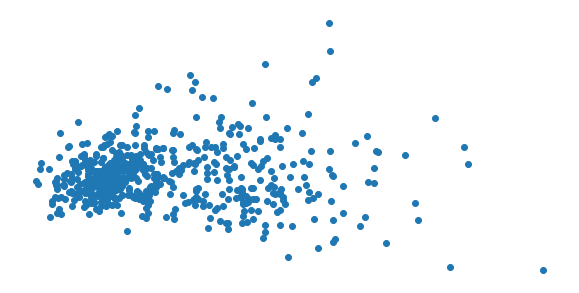

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Not easily distinguishable, let's try other techniques.

### t-SNE

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.011s...
[t-SNE] Computed neighbors for 569 samples in 0.029s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 0.863774
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.292770
[t-SNE] KL divergence after 300 iterations: 1.504261
Cluster Graph with t-SNE with Perplexity  5


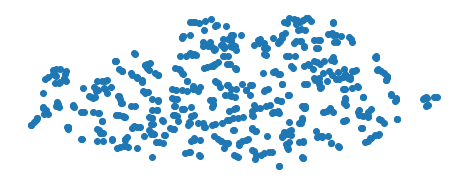

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.011s...
[t-SNE] Computed neighbors for 569 samples in 0.037s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.069654
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.096657
[t-SNE] KL divergence after 300 iterations: 1.442869
Cluster Graph with t-SNE with Perplexity  10


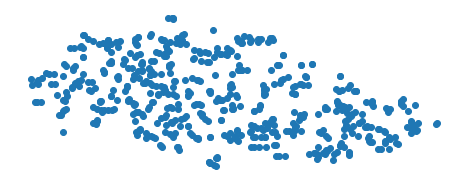

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.013s...
[t-SNE] Computed neighbors for 569 samples in 0.045s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.278566
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.543251
[t-SNE] KL divergence after 300 iterations: 1.188940
Cluster Graph with t-SNE with Perplexity  20


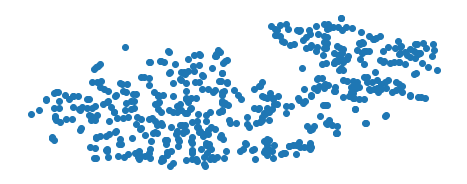

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.004s...
[t-SNE] Computed neighbors for 569 samples in 0.041s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.414330
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.575050
[t-SNE] KL divergence after 300 iterations: 1.064100
Cluster Graph with t-SNE with Perplexity  30


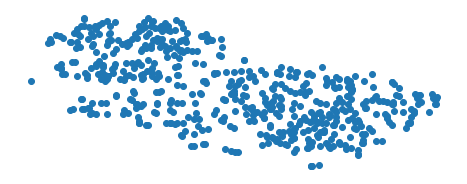

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.017s...
[t-SNE] Computed neighbors for 569 samples in 0.044s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.589211
[t-SNE] KL divergence after 300 iterations: 0.918248
Cluster Graph with t-SNE with Perplexity  40


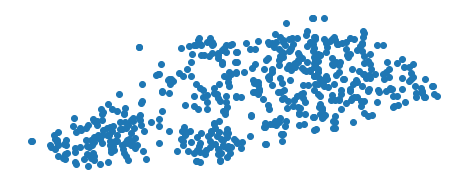

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.003s...
[t-SNE] Computed neighbors for 569 samples in 0.050s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.616457
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.599781
[t-SNE] KL divergence after 300 iterations: 0.850629
Cluster Graph with t-SNE with Perplexity  50


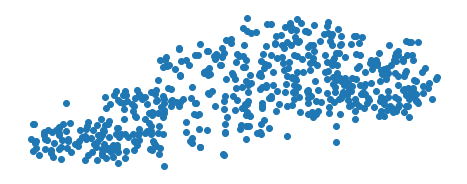

In [15]:
from sklearn.manifold import TSNE

#find best perplexity/n_iter for the data, then fit the data

for perplexity in [5, 10, 20, 30, 40, 50]:
    tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=300)
    tsne_results = tsne.fit_transform(X_std)
    print('Cluster Graph with t-SNE with Perplexity ', perplexity)
    plt.figure(figsize=(8,3))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

In [35]:
plt.figure(figsize=(10,5))
colours = ["r","b"]
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.004s...
[t-SNE] Computed neighbors for 569 samples in 0.044s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.616457
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.059357
[t-SNE] KL divergence after 700 iterations: 0.801846


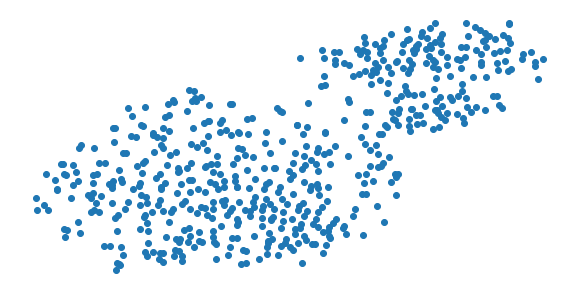

In [31]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=700)
tsne_results = tsne.fit_transform(X_std)

plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

We seem to have two somewhat distinguishable groups here. A higher n_iter gave a better visualization.

### UMAP Visualization

In [20]:
import umap

time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_std)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 2.285097360610962 seconds


5 neighbors  0.01 minimum distance euclidean metric


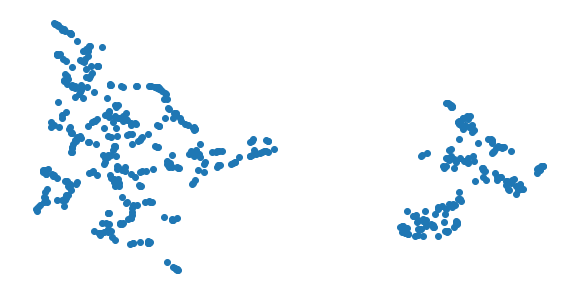



5 neighbors  0.01 minimum distance correlation metric


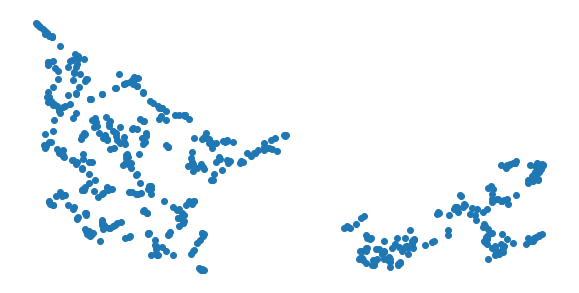



5 neighbors  0.1 minimum distance euclidean metric


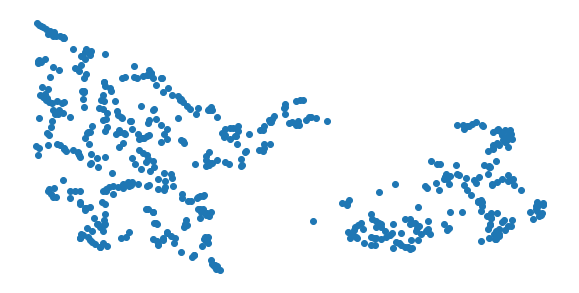



5 neighbors  0.1 minimum distance correlation metric


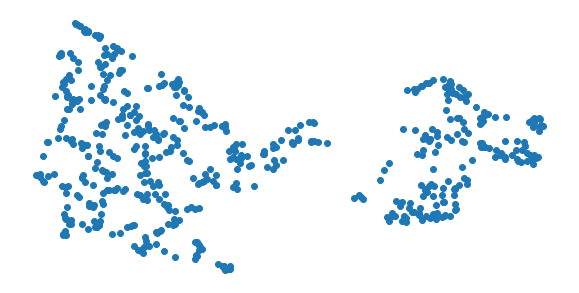



5 neighbors  0.5 minimum distance euclidean metric


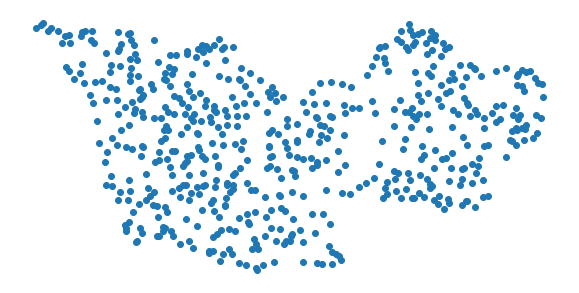



5 neighbors  0.5 minimum distance correlation metric


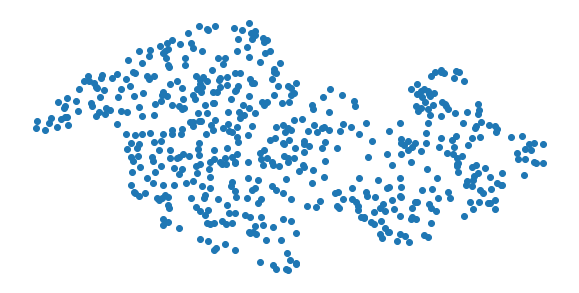



10 neighbors  0.01 minimum distance euclidean metric


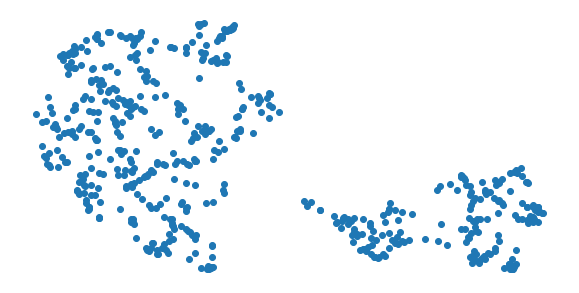



10 neighbors  0.01 minimum distance correlation metric


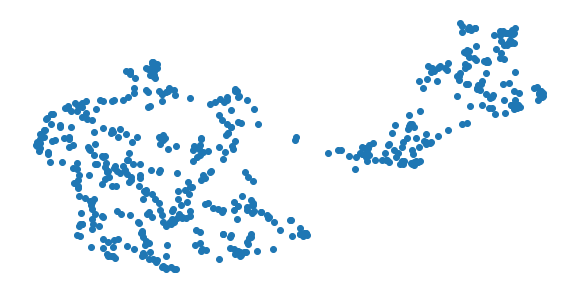



10 neighbors  0.1 minimum distance euclidean metric


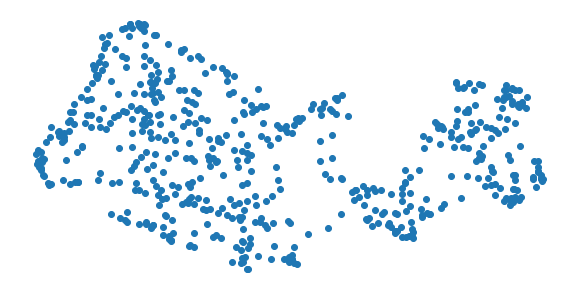



10 neighbors  0.1 minimum distance correlation metric


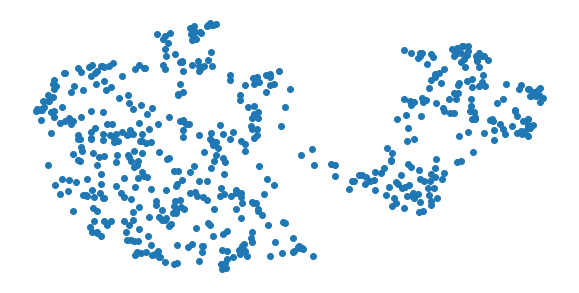



10 neighbors  0.5 minimum distance euclidean metric


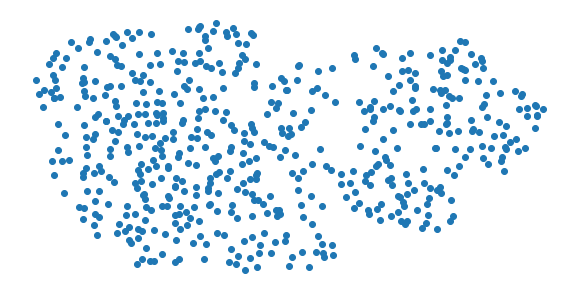



10 neighbors  0.5 minimum distance correlation metric


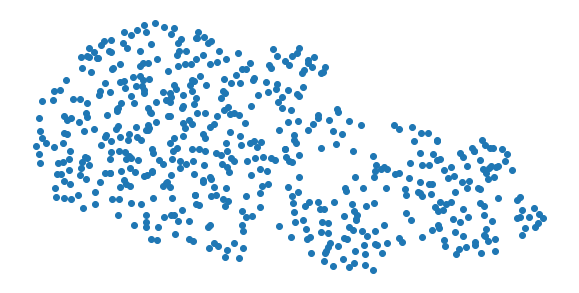



15 neighbors  0.01 minimum distance euclidean metric


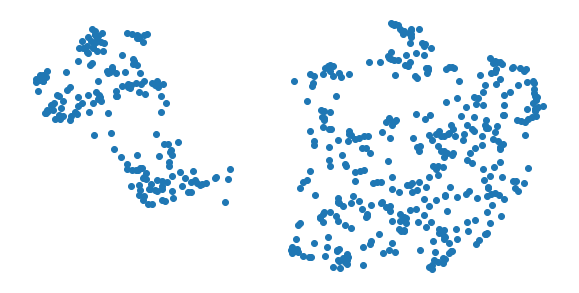



15 neighbors  0.01 minimum distance correlation metric


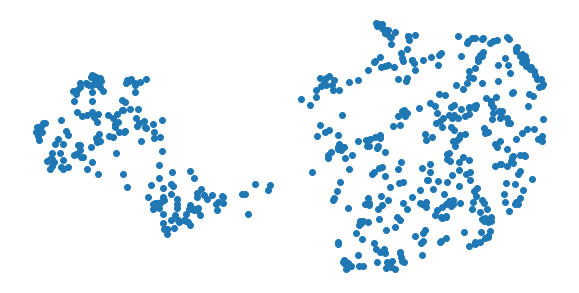



15 neighbors  0.1 minimum distance euclidean metric


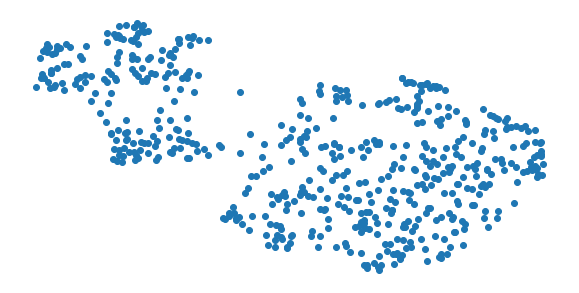



15 neighbors  0.1 minimum distance correlation metric


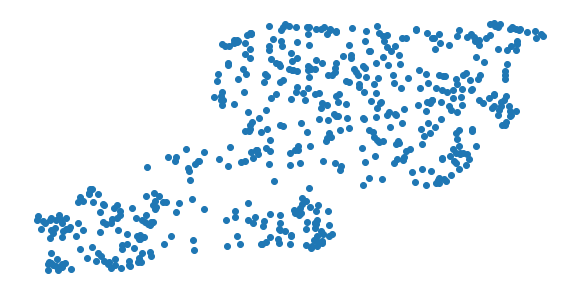



15 neighbors  0.5 minimum distance euclidean metric


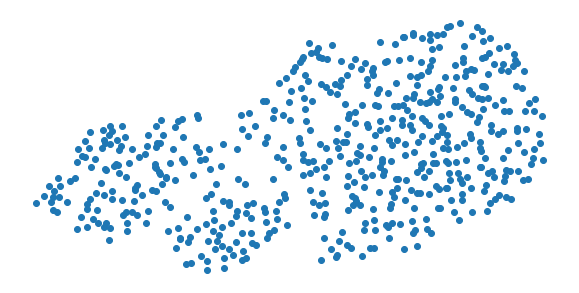



15 neighbors  0.5 minimum distance correlation metric


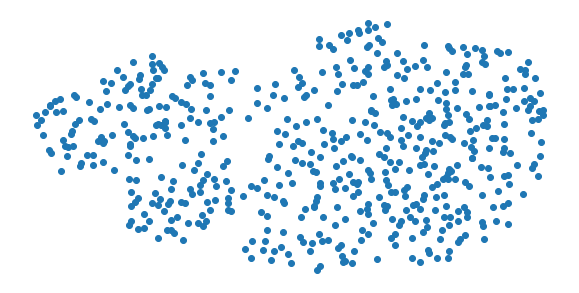



25 neighbors  0.01 minimum distance euclidean metric


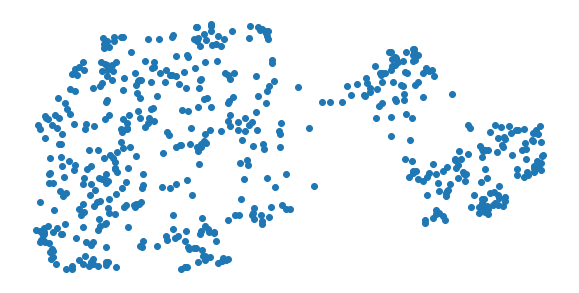



25 neighbors  0.01 minimum distance correlation metric


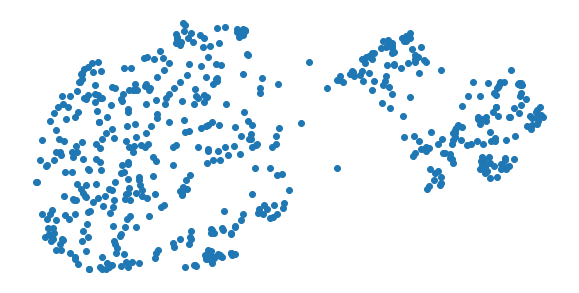



25 neighbors  0.1 minimum distance euclidean metric


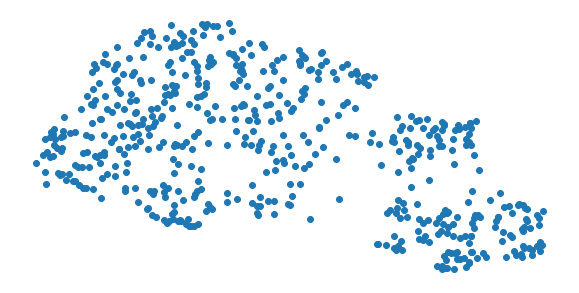



25 neighbors  0.1 minimum distance correlation metric


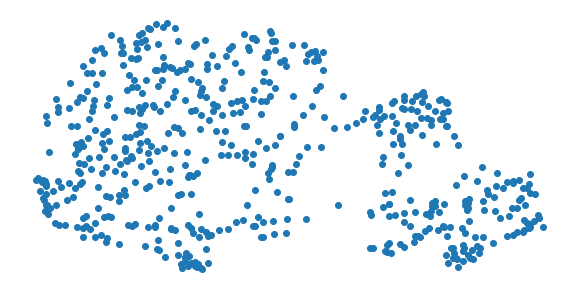



25 neighbors  0.5 minimum distance euclidean metric


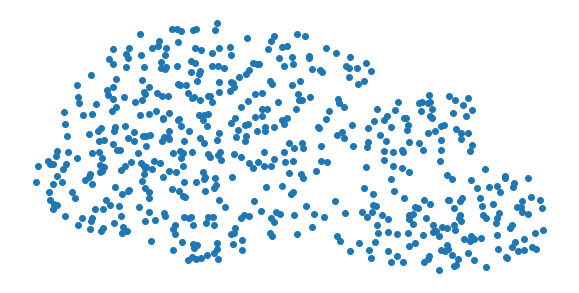



25 neighbors  0.5 minimum distance correlation metric


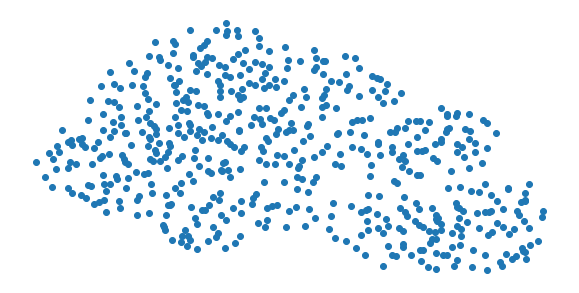

In [17]:
#try different parameters

for n_neighbors in [5, 10, 15, 25]:
    for min_dist in [ 0.01, 0.1, 0.5]:
        for metric in ['euclidean', 'correlation']:
            umap_results = umap.UMAP(n_neighbors=n_neighbors,
                      min_dist=min_dist,
                      metric='euclidean').fit_transform(X_std)
            print(n_neighbors, 'neighbors ', min_dist, 'minimum distance', metric, 'metric')
            plt.figure(figsize=(10,5))
            plt.scatter(umap_results[:, 0], umap_results[:, 1])
            plt.xticks([])
            plt.yticks([])
            plt.axis('off')
            plt.show()
            print('\n')

In [23]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=25,
                      min_dist=0.01,
                      metric='euclidean').fit_transform(X_std)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 1.3036706447601318 seconds


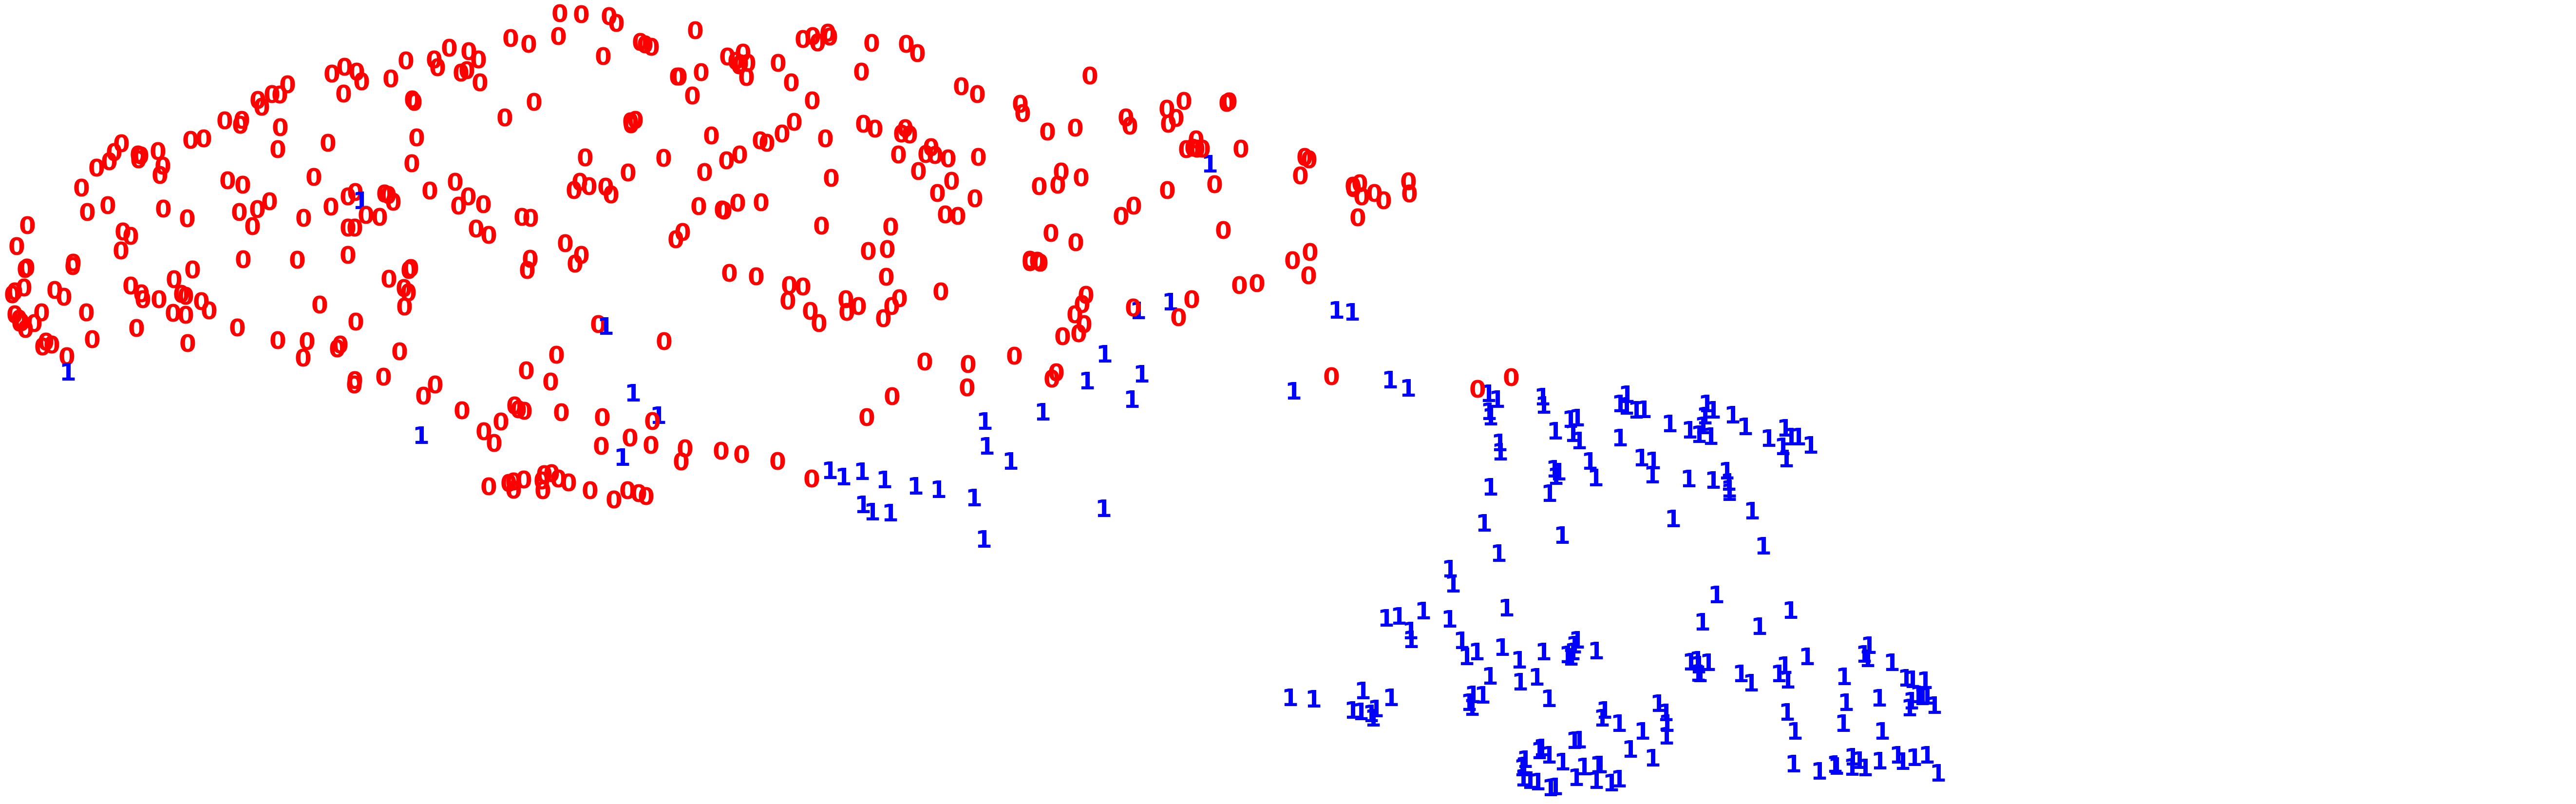

In [24]:
plt.figure(figsize=(10,5))
colours = ["r","b"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], y[i],
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Not bad...

## Clustering the Data

### kMeans

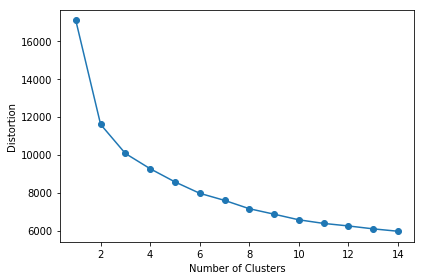

In [43]:
#using the elbow method, determine optimal number of clusters
distortions = []
for i in range (1, 15):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=13)
    km.fit(X_std)
    distortions.append(km.inertia_)
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

Elbow seems to be somehwere in the 2 to 5 range

In [25]:
# test silhouette and ARI scores of possible clusters

from sklearn import metrics

pred_2 = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
pred_3 = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
pred_4 = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)
pred_5 = KMeans(n_clusters=5, random_state=123).fit_predict(X_std)


print("Silhouette score for 2 cluster k-means: {}".format(
    metrics.silhouette_score(X_std, pred_2, metric='euclidean')))
print('ARI Score for 2 cluster k-means: {}'.format(
    metrics.adjusted_rand_score(y, pred_2)))
print("Silhouette score for 3 cluster k-means: {}".format(
    metrics.silhouette_score(X_std, pred_3, metric='euclidean')))
print('ARI Score for 3 cluster k-means: {}'.format(
    metrics.adjusted_rand_score(y, pred_3)))
print("Silhouette score for 4 cluster k-means: {}".format(
    metrics.silhouette_score(X_std, pred_4, metric='euclidean')))
print('ARI Score for 4 cluster k-means: {}'.format(
    metrics.adjusted_rand_score(y, pred_4)))
print("Silhouette score for 5 cluster k-means: {}".format(
    metrics.silhouette_score(X_std, pred_5, metric='euclidean')))
print('ARI Score for 5 cluster k-means: {}'.format(
    metrics.adjusted_rand_score(y, pred_5)))

Silhouette score for 2 cluster k-means: 0.3449740051034408
ARI Score for 2 cluster k-means: 0.6707206476880808
Silhouette score for 3 cluster k-means: 0.3143840098608098
ARI Score for 3 cluster k-means: 0.510670959369618
Silhouette score for 4 cluster k-means: 0.2726156083675339
ARI Score for 4 cluster k-means: 0.584068899762848
Silhouette score for 5 cluster k-means: 0.17574947495510682
ARI Score for 5 cluster k-means: 0.3431477451328304


Two clusters seems best, lets go with that.

In [29]:
#contingency table/evaluation metrics

y_pred = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)

print(pd.crosstab(y, y_pred)) 
print("Silhouette score for 2 cluster k-means: {}".format(
    metrics.silhouette_score(X_std, y_pred, metric='euclidean')))
print('ARI Score for 2 cluster k-means: {}'.format(
    metrics.adjusted_rand_score(y, y_pred)))

col_0        0    1
diagnosis          
0          343   14
1           37  175
Silhouette score for 2 cluster k-means: 0.3449740051034408
ARI Score for 2 cluster k-means: 0.6707206476880808


Given the ARI score, the kmeans cluster is closer to perfect than random which is a good thing. It also appears that our kmeans cluster produces clusters of datapoints that are closer to other datapoints in the cluster than they are to datapoints in the other clusters. 

### Hierarchical Clustering

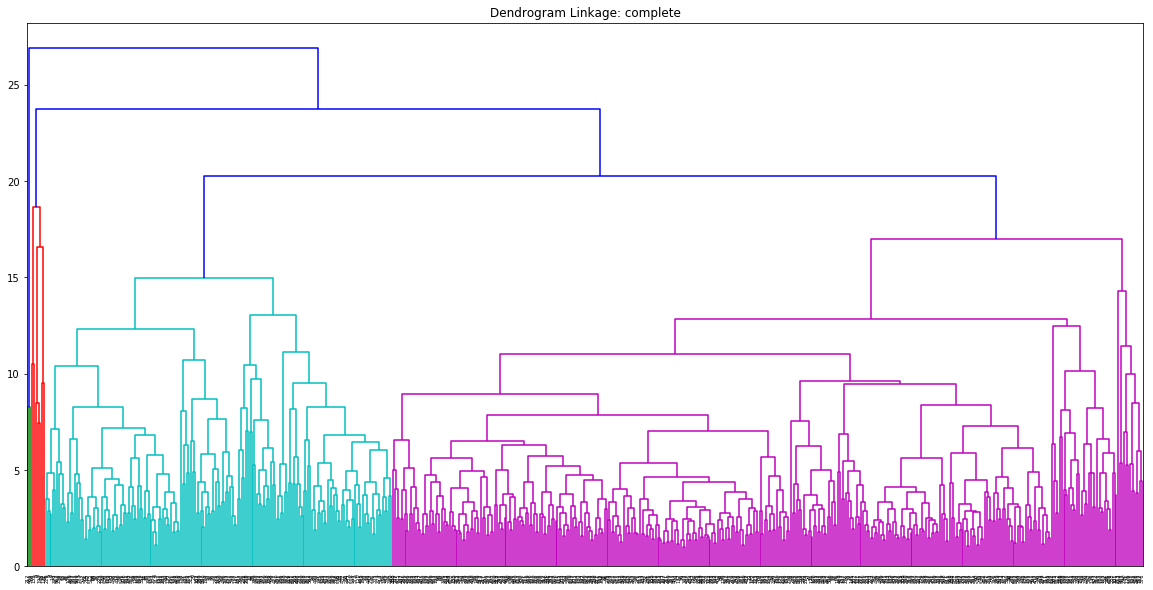

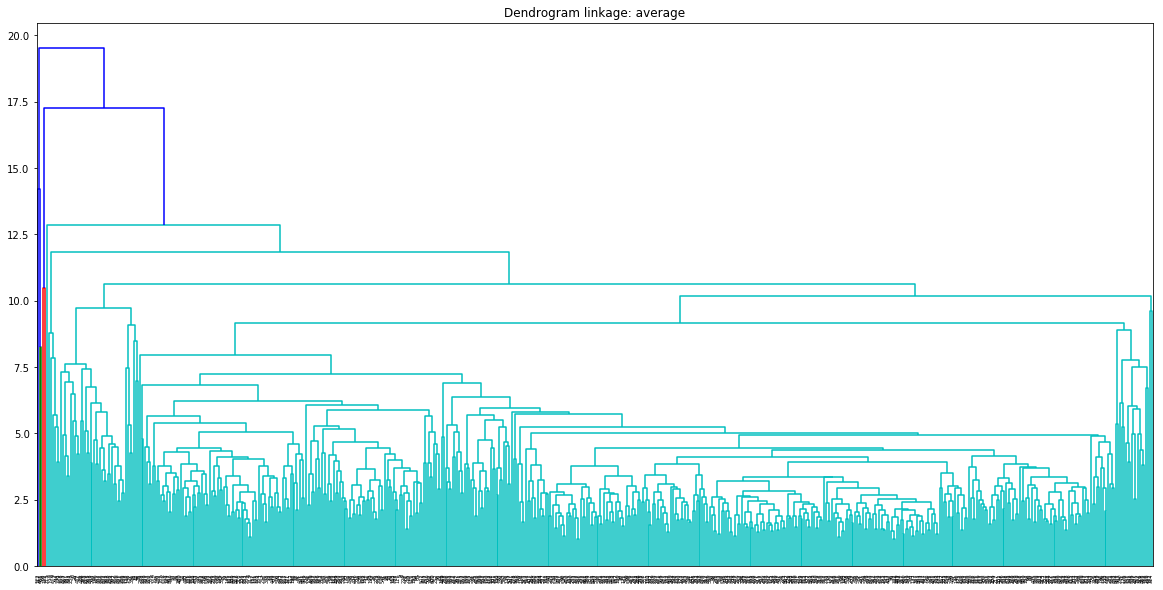

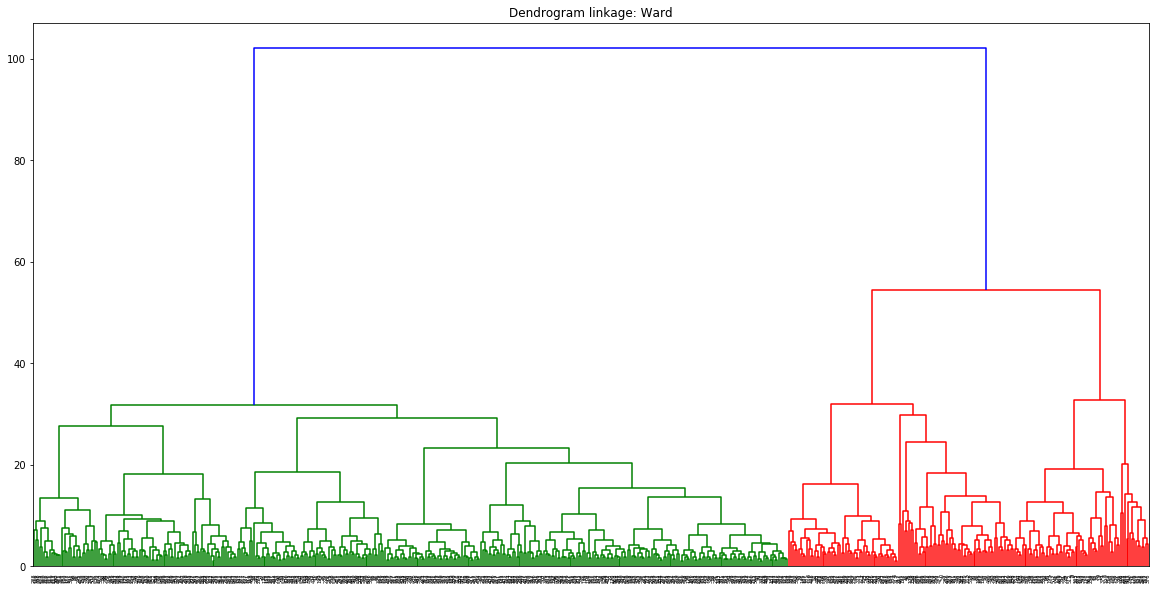

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(20,10))
plt.title("Dendrogram Linkage: complete")
dendrogram(linkage(X_std, method='complete'))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Dendrogram linkage: average")
dendrogram(linkage(X_std, method='average'))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Dendrogram linkage: Ward")
dendrogram(linkage(X_std, method='ward'))
plt.show()

The ward linkage looks to be the most reasonable option here but lets test the ARI and silhouette scores of a few different parameters.

In [46]:
from sklearn.cluster import AgglomerativeClustering

#test different parameters

linkage = ['ward', 'complete', 'average']
groups = [2, 3, 4, 5]
for link in linkage:
    for cluster in groups:
        agg_cluster = AgglomerativeClustering(linkage=link, 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        clusters = agg_cluster.fit_predict(X_std)
        print('Agg Cluster with', link, 'linkage and', cluster, 'clusters')
        print('ARI Score: {}' .format(metrics.adjusted_rand_score(y, clusters)))
        print('Silhouette Score: {}'.format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))
        print('\n')

Agg Cluster with ward linkage and 2 clusters
ARI Score: 0.5750409366326297
Silhouette Score: 0.33938477753669855


Agg Cluster with ward linkage and 3 clusters
ARI Score: 0.5363453581467522
Silhouette Score: 0.33009721062922587


Agg Cluster with ward linkage and 4 clusters
ARI Score: 0.5434038558275803
Silhouette Score: 0.2981990434923712


Agg Cluster with ward linkage and 5 clusters
ARI Score: 0.5037584604291773
Silhouette Score: 0.24340428427139352


Agg Cluster with complete linkage and 2 clusters
ARI Score: 0.004828344696591908
Silhouette Score: 0.6606668813897673


Agg Cluster with complete linkage and 3 clusters
ARI Score: 0.013997785390623544
Silhouette Score: 0.5450468576313827


Agg Cluster with complete linkage and 4 clusters
ARI Score: 0.6440484058027464
Silhouette Score: 0.3151137531703234


Agg Cluster with complete linkage and 5 clusters
ARI Score: 0.6441757519863636
Silhouette Score: 0.31457781521733424


Agg Cluster with average linkage and 2 clusters
ARI Score: 0.007

Visually, using the ward linkage and 2 clusters performs best. However, from the ARI scores, complete linkage with 4 and 5 clusters performs pretty well. 

### DBScan

In [47]:
from sklearn.cluster import DBSCAN

#test a variety of parameters

eps = [2, 5, 10]
min_samples = [2, 3, 4, 5, 10]

for ep in eps:
    for min_sample in min_samples:
        dbscan_cluster = DBSCAN(eps=ep, 
                                      min_samples=min_sample)
        clusters = dbscan_cluster.fit_predict(X_std)
        
        print('DBSCAN with', ep, 'eps and', min_sample, 'min samples')
        print("Adjusted Rand Index of the DBSCAN solution: {}".format(metrics.adjusted_rand_score(y, clusters)))
        print("The silhoutte score of the DBSCAN solution: {}".format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))
        print('\n')

DBSCAN with 2 eps and 2 min samples
Adjusted Rand Index of the DBSCAN solution: 0.14885494773561506
The silhoutte score of the DBSCAN solution: -0.25976145940912426


DBSCAN with 2 eps and 3 min samples
Adjusted Rand Index of the DBSCAN solution: 0.14215678903900913
The silhoutte score of the DBSCAN solution: -0.2039589776152087


DBSCAN with 2 eps and 4 min samples
Adjusted Rand Index of the DBSCAN solution: 0.12181315970518204
The silhoutte score of the DBSCAN solution: -0.17453690655706258


DBSCAN with 2 eps and 5 min samples
Adjusted Rand Index of the DBSCAN solution: 0.09635079487159538
The silhoutte score of the DBSCAN solution: -0.19851389887763776


DBSCAN with 2 eps and 10 min samples
Adjusted Rand Index of the DBSCAN solution: 0.044176843813065234
The silhoutte score of the DBSCAN solution: 0.04013062800436271


DBSCAN with 5 eps and 2 min samples
Adjusted Rand Index of the DBSCAN solution: 0.01860993183820016
The silhoutte score of the DBSCAN solution: 0.48099928840485745



Seeing some interesting results above. As epsilon increases, the silhouette score increases. ARI score stays the same at > 5 eps, regardless of the min_samples. The silhouette score follows a very similar pattern.

### GMM

In [49]:
from sklearn.mixture import GaussianMixture

covariance_types = ['full', 'tied', 'diag', 'spherical']
n_components = [2, 3, 4, 5]

for c in covariance_types:
    for n in n_components:
        gmm_cluster = GaussianMixture(n_components=n, random_state=123, 
                                     covariance_type=c)
        clusters = gmm_cluster.fit_predict(X_std)
        print('GMM with', c, 'covariance type and', n, 'components')
        print("Adjusted Rand Index of the GMM solution: {}".format(metrics.adjusted_rand_score(y, clusters)))
        print("The silhoutte score of the GMM solution: {}".format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))
        print('\n')

GMM with full covariance type and 2 components
Adjusted Rand Index of the GMM solution: 0.7740159832538671
The silhoutte score of the GMM solution: 0.31448870991364997


GMM with full covariance type and 3 components
Adjusted Rand Index of the GMM solution: 0.6096083657006669
The silhoutte score of the GMM solution: 0.2617362642012076


GMM with full covariance type and 4 components
Adjusted Rand Index of the GMM solution: 0.29302936574251987
The silhoutte score of the GMM solution: 0.1309353235977075


GMM with full covariance type and 5 components
Adjusted Rand Index of the GMM solution: 0.3000289278874207
The silhoutte score of the GMM solution: 0.12811560121110782


GMM with tied covariance type and 2 components
Adjusted Rand Index of the GMM solution: 0.6991892990320389
The silhoutte score of the GMM solution: 0.33115566453974277


GMM with tied covariance type and 3 components
Adjusted Rand Index of the GMM solution: 0.48268601441672165
The silhoutte score of the GMM solution: 0.

Using GMM with full covariance and 2 components has given us our highest ARI score thus far.

### Putting It All Together

GMM with full covariance and 2 components gave the highest ARI score with a silhouette score that showed datapoints that are closer to other datapoints in the cluster than they are to datapoints in the other cluster. 

In [51]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, covariance_type='full',random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(umap_results)

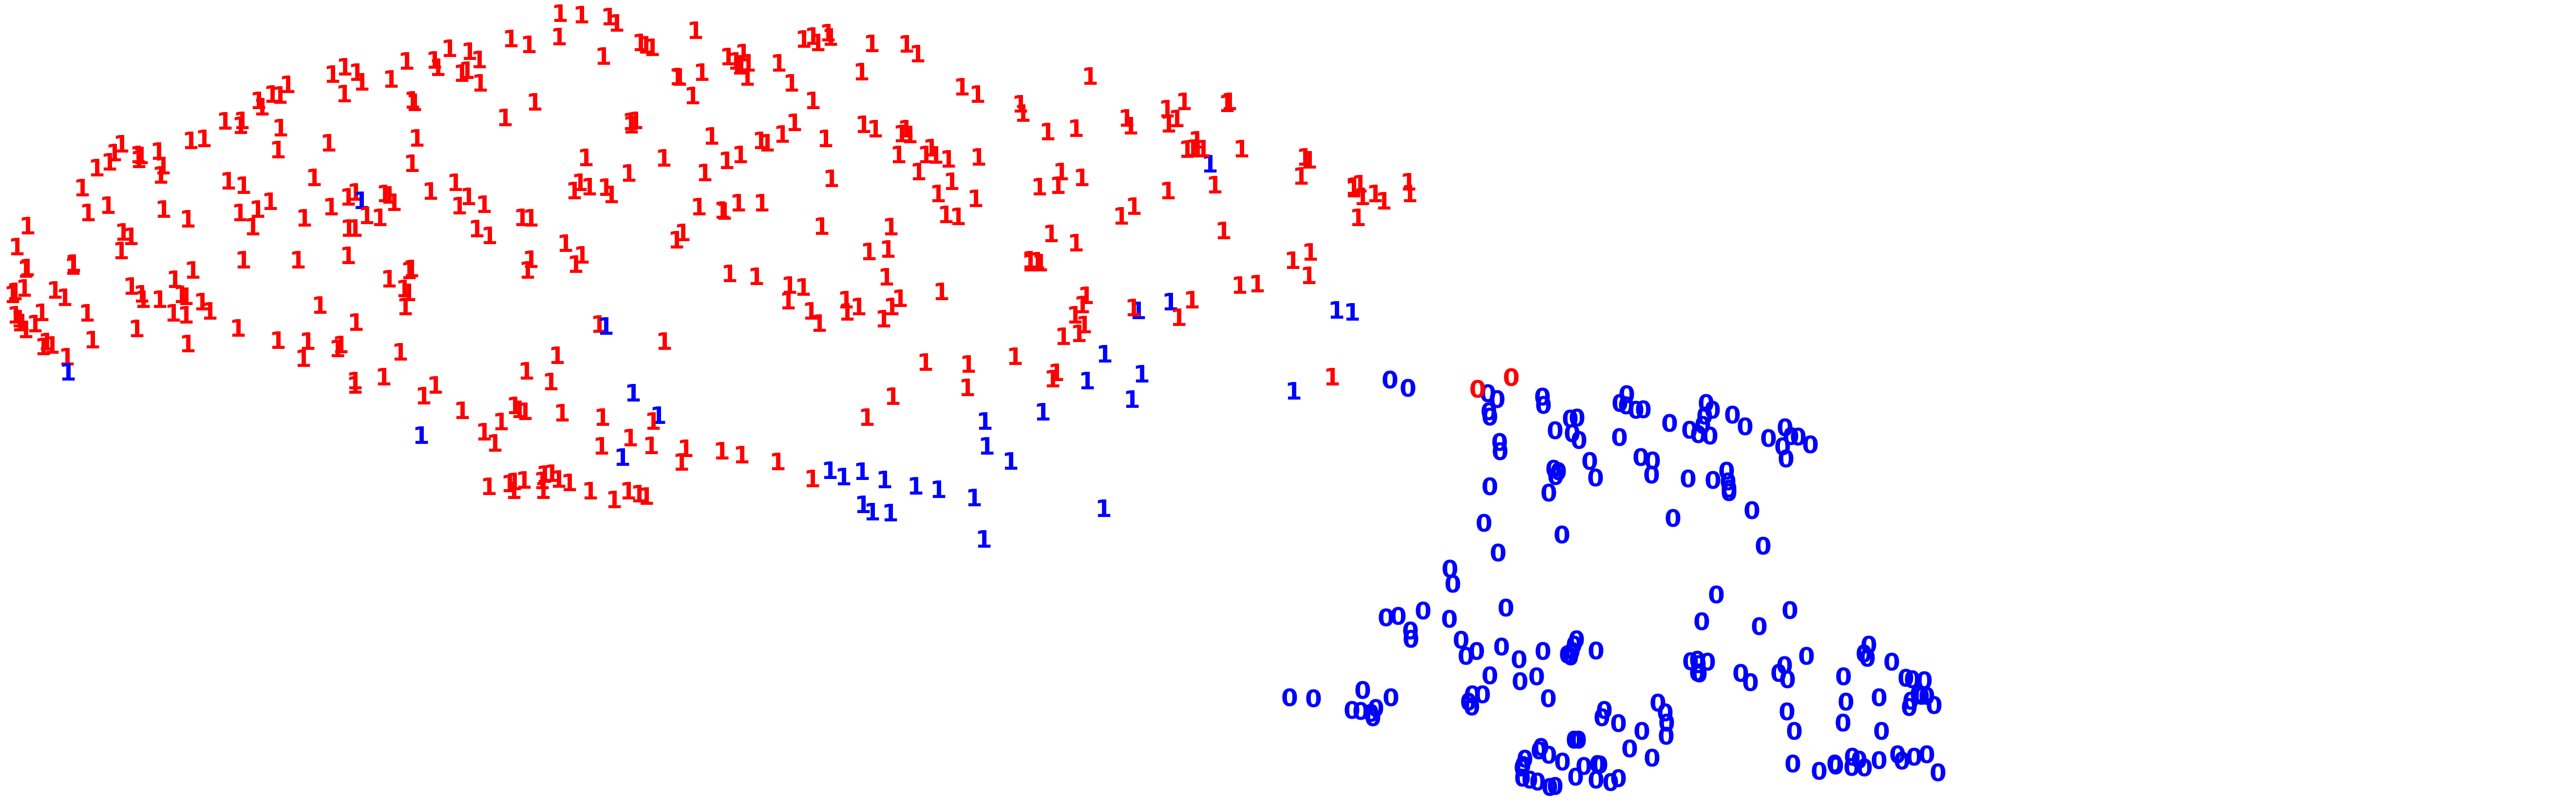

In [52]:
plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [53]:
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the GMM solution: 0.7667510735506516
The silhoutte score of the GMM solution: 0.33415471069474906


In [54]:
pd.crosstab(y, clusters)

col_0,0,1
diagnosis,,
0,2,355
1,179,33


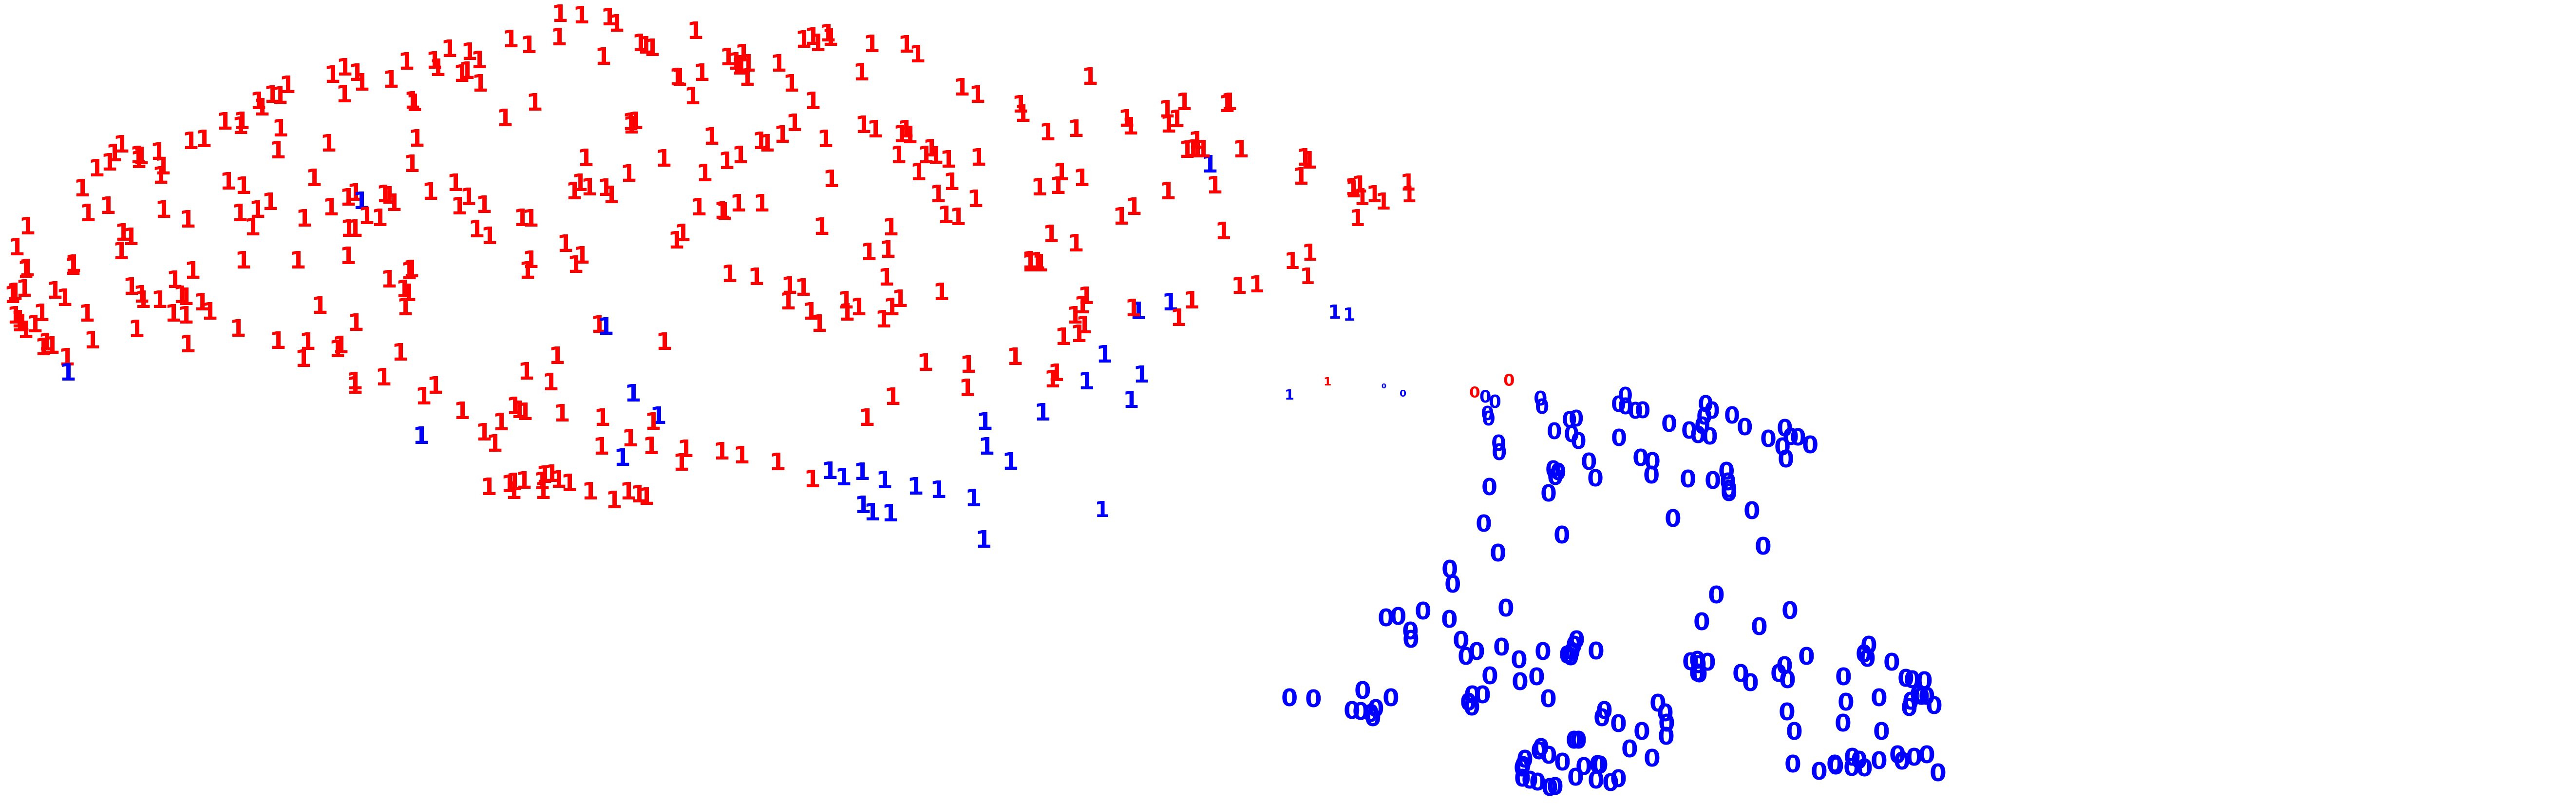

In [56]:
#soft clustering

probs = gmm_cluster.predict_proba(umap_results)

size = 50 * probs.max(1) ** 2  # square emphasizes differences

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': size[i]}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## Conclusions

Using the GMM cluster algorithm with our best umap results yielded the below results.

- ARI Score - 0.77
- Silhouette Score - 0.33

These scores confirm the clustering is closer to perfect than random, and that the datapoints are closer to other datapoints in the assigned cluster than they are to datapoints in the other cluster. Overall, the clustering visualization looks decent using our best performing umap_results as our dimensionality reduction tool. While there are some mislabelled data points, they are limited. 
